In [1]:
import pickle as p
import torch
import torchvision
import Inception
import BasicCNN
import seaborn as sn
import pandas as pd
import numpy as np
import os
import scikitplot as skplt
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

plt.rcParams["figure.figsize"] = (15,10)

Running GPU.


In [2]:
def test_loader(model,types):
    cwd = os.getcwd()
    data_path = r"C:\Users\marcv\Desktop\Lime Results\256_Train_upsample_only\\"+types

    
    if list(model.split("_")[0])[0] == "i":
        test_dataset = torchvision.datasets.ImageFolder(
            root=data_path,
            transform=torchvision.transforms.Compose([
                #torchvision.transforms.RandomRotation(180),
                #torchvision.transforms.RandomHorizontalFlip(p=0.5),
                torchvision.transforms.Pad((21, 22, 22, 21)),
                torchvision.transforms.ToTensor()])
            )
        test_loader = torch.utils.data.DataLoader(
            test_dataset,
            batch_size=1,
            num_workers=0,
            shuffle=False
        )
        
        
        
    elif list(model.split("_")[0])[0] == "b":
        test_dataset = torchvision.datasets.ImageFolder(
            root=data_path,
            transform=torchvision.transforms.Compose([
                #torchvision.transforms.RandomRotation(180),
                #torchvision.transforms.RandomHorizontalFlip(p=0.5),
                #torchvision.transforms.Pad((21, 22, 22, 21)),
                torchvision.transforms.ToTensor()])
            )
        test_loader = torch.utils.data.DataLoader(
            test_dataset,
            batch_size=1,
            num_workers=0,
            shuffle=False
        )
        
        
        

    cp = torch.load(cwd+"\\Trained_models\\Mix\\"+model,map_location='cuda:0')

    cp_new_dict = dict()
    for key in cp['state_dict']:
        newkey=key[7:]
        cp_new_dict[newkey] = cp['state_dict'][key]
    net.load_state_dict(cp_new_dict)
    
    
    

    

        
    return test_dataset, test_loader

## Making Precision-Recall and ROC

In [6]:
for model in os.listdir(r"C:/Users/marcv/Desktop/Lime Results/Trained_models/Mix/"):
    if model.split(".")[-1] == "tar":
        prob_list = list()
        truth_list = list()
        truths = None
        probs = None
        if list(model.split("_")[0])[0] == "i":
            net = Inception.inception_v3().to(device)
        elif list(model.split("_")[0])[0] == "b":
            net = BasicCNN.Net_256().to(device)

        net.eval()
        for i, (test_images, test_labels) in enumerate(test_loader(model,'Test')[1],0):
            inputs = test_images.to(device)
            labels = test_labels
            out = net(inputs).detach().cpu()
            prob = torch.sigmoid(out)
            pred = (prob>0.5).float().numpy()
            truth = test_labels.numpy()[0]
            prob_list.append(prob.numpy()[0][0])
            truth_list.append(truth)

        print(model)
        truths = np.array(truth_list)
        probs = np.ndarray(shape=(len(prob_list),2))
        for idx, val in enumerate(prob_list):
            probs[idx] = [1-val,val]


        skplt.metrics.plot_precision_recall(truths, probs)
        plt.savefig(model.split(".")[0]+"PR")
        plt.clf()
        skplt.metrics.plot_roc(truths, probs)
        plt.savefig(model.split(".")[0]+"ROC")
        plt.clf()

basiccnnMix150x3.pth.tar
basiccnnMix150x4.pth.tar
inceptionMix150x3.pth.tar
inceptionMix150x4.pth.tar


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

## Making confusion matrices

In [8]:
for model in os.listdir(r"C:/Users/marcv/Desktop/Lime Results/Trained_models/"):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    Total = 0
    if model.split(".")[-1] == "tar":
        prob_list = list()
        truth_list = list()
        truths = None
        probs = None
        if list(model.split("_")[0])[0] == "i":
            net = Inception.inception_v3().to(device)
        elif list(model.split("_")[0])[0] == "b":
            net = BasicCNN.Net_256().to(device)

        net.eval()
        for i, (test_images, test_labels) in enumerate(test_loader(model,"Validation")[1],0):
            inputs = test_images.to(device)
            labels = test_labels
            out = net(inputs).detach().cpu()
            prob = torch.sigmoid(out)
            pred = (prob>0.5).float().numpy()
            truth = test_labels.numpy()[0]
            prob_list.append(prob.numpy()[0][0])
            truth_list.append(truth)
            
        
            if pred == 1 and truth == 1:
                TP += 1
            elif pred ==0 and truth == 0:
                TN += 1
            elif pred == 1 and truth == 0:
                FP += 1
            elif pred == 0 and truth == 1:
                FN += 1
            Total += 1

        array = [[TP,FP],
                 [FN,TN]]

        df_cm = pd.DataFrame(array, range(2), range(2))
        # plt.figure(figsize=(10,7))
        sn.set(font_scale=1.4) # for label size
        x=['Actual Positive', 'Actual Negative']
        y=['Positive', 'Negative']
        sn.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap='YlGnBu',fmt='g',xticklabels=x, yticklabels=y) # font size
        plt.tight_layout()
        plt.savefig(model.split(".")[0])
        plt.clf()

In [37]:
probs = np.ndarray(shape=(len(prob_list),2))

In [38]:
for idx, val in enumerate(prob_list):
    probs[idx] = [1-val,val]

In [39]:
truths = np.array(truth_list)

In [4]:
plt.rcParams["figure.figsize"] = (15,10)

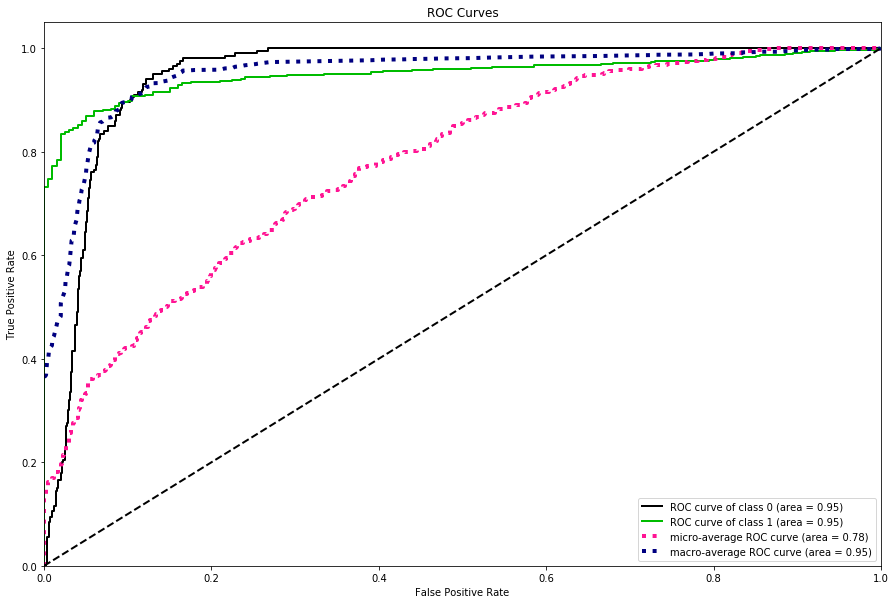

In [41]:
skplt.metrics.plot_roc(truths, probs)
plt.savefig("ROC")
plt.show()

In [223]:
roc_auc_score(truth_list, prob_list)


0.9662980305191515

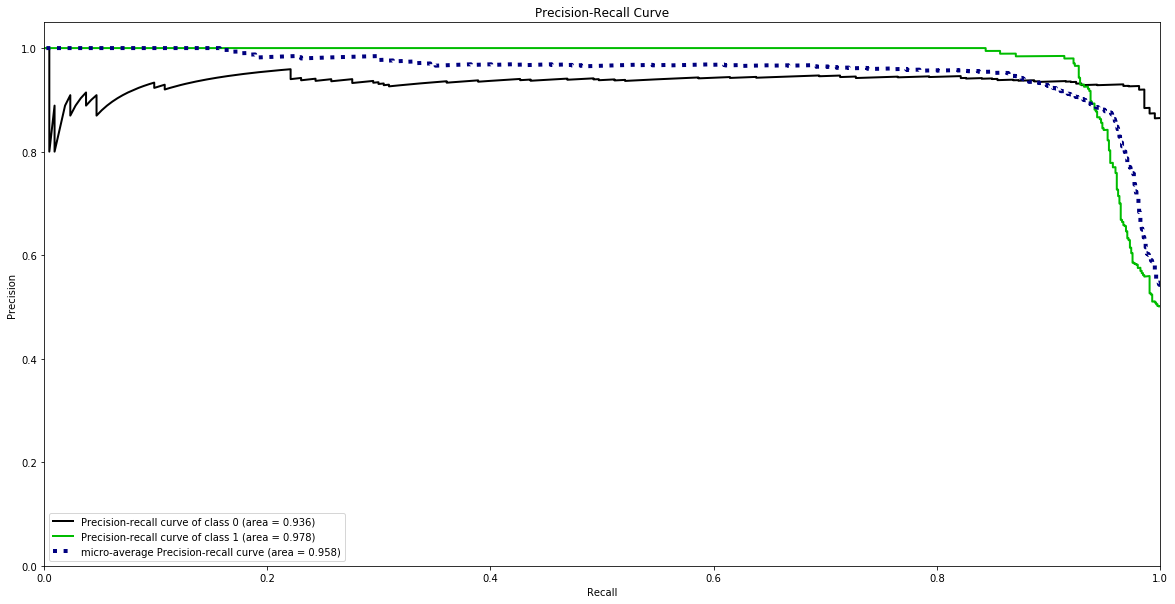

In [231]:
skplt.metrics.plot_precision_recall(truths, probs)
plt.savefig("Precision_recall")
plt.show()

In [25]:
for i in os.listdir(r"C:/Users/marcv/Desktop/Lime Results/Trained_models"):
    print(i)

basiccnn.pth.tar
basiccnn_data-augment.pth.tar
basiccnn_downsample.pth.tar
basiccnn_downsample_data-augment.pth.tar
inception.pth.tar
inception_data-augment.pth.tar
inception_downsample.pth.tar
inception_downsample_data-augment.pth.tar
